# **MILESTONE 3**
### **Analisis Terhadap Automatisasi ETL dan Validasi Data Pada Layanan Pesan Antar Makanan Daring**

___
Nama: Rafi Arya Siregar
 
Batch: HCK-028

Objektif: Tujuan dari proyek ini adalah untuk mengidentifikasi dan menganalisis dataset yang berkaitan dengan layanan pesan antar makanan daring yyang terkumpul dalam jangka waktu tertentu menggunakan data yang diambil dari situs kaggle. Proses yang akan dilakukan meliputi pembuatan alur proses kegiatan ETL menggunakan Directed Acyclic Graph (DAG) yang disediakan oleh apache airflow serta penggunaan Great Expectations sebagai teknik validasi data. Saya menggunakan dataset yang tersedia di [kaggle](https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset) untuk diolah (preprocess) agar menghasilkan dataset yang bersih dan layak digunakan untuk keperluan viisualisasi data sebagai informasi utuh.
___

# **A. LATAR BELAKANG**
___
Saya adalah seorang data scientist yang saat ini bekerja di sebuah perusahaan startup aplikasi online. Seiring dengan pertumbuhan pesat industri teknologi dan perubahan gaya hidup masyarakat, layanan pesan antar makanan secara daring telah menjadi bagian integral dari kehidupan sehari-hari. Dataset diperoleh dari situs [kaggle](https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset) berisi informasi dari platform pemesanan makanan daring selama periode tertentu, mencakup berbagai atribut terkait demografi, lokasi, dan perilaku konsumen.

## **SMART FRAMEWORK**
___
**PROBLEM STATEMENT:**

Bagaimana pola pemesanan makanan daring dipengaruhi oleh faktor-faktor demografis konsumen, dan bagaimana informasi ini dapat digunakan untuk meningkatkan pengalaman pengguna serta strategi bisnis platform pemesanan makanan?

1. Specific: Mengidentifikasi pola pemesanan berdasarkan demografi pengguna.
2. Measurable: Menilai frekuensi pemesanan dan kategori pemesan.
3. Achievable: Mengidentifikasi data dan berhasil melakukan ETL menggunakan berbagai tools yang disediakan.
4. Relevant: Informasi ini penting bagi platform untuk strategi pemasaran dan peningkatan layanan.
5. Time Bound: Analisis dilakukan dalam periode waktu 2 minggu.

## **PENJABARAN MASALAH**
___
- Variasi Pola Pemesanan: Perbedaan frekuensi pemesanan dengan melihat variabel usia, pekerjaan, lokasi, tingkat pendidikan dan variabel lainnya.
- Preferensi Konsumen: Bagaimana demografi mempengaruhi pilihan makanan dan waktu pemesanan.
- Feedback dan Output pemesanan berdasarkan demografi pemesan.

## **JUSTIFIKASI PERMASALAHAN**
___

Industri layanan pesan antar makanan daring di Indonesia telah mengalami pertumbuhan signifikan, terutama setelah pandemi COVID-19. Platform seperti GoFood, GrabFood, dan ShopeeFood menjadi pilihan utama masyarakat dalam memenuhi kebutuhan konsumsi sehari-hari. Menurut penelitian Measurable AI, permintaan konsumen terhadap layanan OFD meningkat secara konsisten selama pandemi dan berlanjut pasca-pandemi, dengan rata-rata nilai transaksi per pesanan (Average Order Value/AOV) meningkat hampir 50% dari sekitar Rp40.000 pada 2019 menjadi Rp60.000 pada 2022. [kontan.co.id](https://english.kontan.co.id/news/online-food-delivery-industry-still-growing-in-indonesia)

## **USER**
___
Marketing Division, IT Division, Finance Division.

# **B. IMPORT LIBRARIES**
___
Mengimport package/module yang digunakan dalam proses validasi menggunakan package Great Expectations.

In [53]:
import pandas as pd
import great_expectations
from great_expectations.data_context import FileDataContext


Mengecek version Great Expectations yang digunakan.

In [54]:
print(great_expectations.__version__)

0.18.19


# **C. GREAT EXPECTATIONS**
___
Great Expectations merupakan framework yang digunakan untuk melakukan validasi data. Tujuan melakukan validasi adalah memeriksa apakah data sudah sesuai dengan kriteria tertentu, seperti format data, tipe nilai data, serta konsistensi dari data agar data yang digunakan telah terverifikasi secara otomatis sesuai dengan validasi yang telah ditetapkan. Great Expectations dapat diintegrasikan menggunakan Apache Airflow, agar proses validasi dapat terjadi secara otomatis sepanjang alur proses kerja ETL. 

[Reference](https://medium.com/python-in-plain-english/perform-data-quality-test-on-your-data-pipelines-with-great-expectations-bbe8f5e8816b)

Data overview dari dataset yang akan digunakan: 

| **Kolom**                      | **Penjelasan**                                                           |
| ------------------------------ | ------------------------------------------------------------------------ |
| **Age**                        | Usia pelanggan.                                                          |
| **Gender**                     | Jenis kelamin pelanggan.                                                 |
| **Marital Status**             | Status pernikahan pelanggan.                                             |
| **Occupation**                 | Pekerjaan pelanggan.                                                     |
| **Monthly Income**             | Pendapatan bulanan pelanggan.                                            |
| **Educational Qualifications** | Kualifikasi pendidikan pelanggan.                                        |
| **Family Size**                | Jumlah anggota dalam keluarga pelanggan.                                 |
| **Latitude**                   | Garis lintang lokasi pelanggan.                                          |
| **Longitude**                  | Garis bujur lokasi pelanggan.                                            |
| **Pin Code**                   | Kode pos lokasi pelanggan.                                               |
| **Output**                     | Status terkini dari pesanan (Yes:Terkirim;No:Tidak Terkirim). |
| **Feedback**                   | Umpan balik yang diberikan oleh pelanggan setelah menerima pesanan.      |


Menginisasi kolom index pada dataset clean yang telah dilakukan preprocessing untuk keperluan validasi (Great Expectations).

In [55]:
# Menginisasi dataframe menggunakan data csv clean
df = pd.read_csv('P2M3_rafi_siregar_data_clean.csv')

# Menambahkan kolom 'id' dengan nomor urut dimulai dari 1
df['id'] = range(1, len(df) + 1)

# Menyusun id di sisi paling kiri
id_col = ['id'] + [col for col in df.columns if col != 'id']
df = df[id_col]

# Menyimpan kembali ke CSV pada direktori yang sama
df.to_csv('P2M3_rafi_siregar_data_clean.csv', index=False)

Mendefinisikan Great Expectations menggunakan dataset yang telah diproses melalui tahap ETL dalam DAG. Selain itu, saya juga menginisialisasi data context untuk mengakses berbagai sumber data, serta menginisiasi data source yang digunakan untuk melakukan validasi data menggunakan Great Expectations.

In [56]:
# Membuat objek data context
context = FileDataContext.create(project_root_dir='./')

# Menetapkan nama untuk sumber data pada data source dengan menghapus data sebelumnya (jika ada).
datasource_name = 'csv-online-food-deliveries'
context.sources.delete_pandas("csv-online-food-deliveries")  
datasource = context.sources.add_pandas(datasource_name)  

# Menetapkan nama untuk asset pada direktori dengan menambahkan asset dari file csv
asset_name = 'online-food-deliveries'
path_to_data = 'P2M3_rafi_siregar_data_clean.csv' 
asset = datasource.add_csv_asset(asset_name, filepath_or_buffer=path_to_data) 

# Membuat permintaan batch untuk pemrosesan data
batch_request = asset.build_batch_request()  


Menginisialisasi expectation suite untuk melakukan fungsi expectations pada data yang telah diproses dan digabungkan.

In [57]:
# Membuat expectation suite baru dengan nama tertentu. Menggunakan add or method add or update, mama akan diperbarui jika sudah ada.
expectation_suite_name = 'expectation-online-food-deliveries'
context.add_or_update_expectation_suite(expectation_suite_name)

# Membuat objek validator menggunakan batch request dan expectation suite yang telah dibuat
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name=expectation_suite_name
)

# Menampilkan top 5 baris data
validator.head()

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

,id,age,gender,marital_status,occupation,monthly_income,educational_qualifications,family_size,latitude,longitude,pin_code,output,feedback
0,1,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,2,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,3,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,4,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,5,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


Kode di atas digunakan untuk membuat expectation suite dan validator untuk menginisiasi dan menerapkan aturan validasi data. Setelah inisiasi dilakukan maka validator akan menampilkan top 5 baris data. Calculating Metrics menampilkan status berhasil tanpa error, yang berarti validator siap digunakan.

## **I. Expect Column Values To Contain Set**

In [58]:
validator.expect_column_distinct_values_to_contain_set(
    column="marital_status",
    value_set=["Single", "Married"]
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": [
      "Married",
      "Prefer not to say",
      "Single"
    ],
    "details": {
      "value_counts": [
        {
          "value": "Married",
          "count": 87
        },
        {
          "value": "Prefer not to say",
          "count": 9
        },
        {
          "value": "Single",
          "count": 189
        }
      ]
    }
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

**Berikut analisis terhadap ekspektasi Column Values To Contain Set:**

1. Hasil menunjukan response ``success : true``, yang berarti ekspektasi terpenuhi, namun tidak semua nilai benar karena ada value di luar ekspektasi yaitu `Prefer not to say`.

2. ``value_counts`` menunjukkan jumlah kemunculan setiap nilai:
   - Married: **87 entri data**
   - Single: **189 entri data**
   - Prefer not to say: **9 entri data**

3. ``unexpected_count`` tidak ada karena tidak ada pengecekan validasi nilai per baris, hanya distinct values.

4. ``raised_exception`` menunjukan bahwa tidak terjadi error selama eksekusi.

Penggunaan ini ditujukan agar setiap entri user diharapkan memuat informasi pernikahan pengguna.

## **II. Expect Column Values To Be Unique**

In [59]:
validator.expect_column_values_to_be_unique(column="id")

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 285,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

**Berikut analisis terhadap ekspektasi Column Values To Be Unique:**

1. Hasil menunjukkan response ``success: true``, yang berarti semua nilai pada kolom id berhasil memenuhi ekspektasi keunikan.

2. ``element_count`` menunjukkan jumlah total data yang divalidasi sebanyak **285 entri data**, yang semuanya lolos validasi.

3. ``unexpected_count`` sebesar 0, artinya tidak ditemukan nilai yang duplikat atau tidak unik pada kolom id.

4. ``missing_count`` juga bernilai 0, yang berarti **tidak ada nilai kosong (null)** dalam kolom id.

5. ``raised_exception`` menunjukkan bahwa **tidak terjadi error atau pengecualian** selama proses validasi dijalankan.

Penggunaan ekspektasi ini bertujuan untuk memastikan bahwa kolom id dapat diandalkan sebagai identifier unik untuk setiap baris data, penting dalam proses ETL dan pengelolaan database.

## **III. Expect Column Values To Be Between**

In [63]:
validator.expect_column_values_to_be_between(
    column="age",
    min_value=0,
    max_value=100
)

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 285,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

**Berikut analisis terhadap ekspektasi Column To Be Between (Min & Max Value) :**

1. Hasil validasi ``success: true``, artinya seluruh nilai pada kolom age berhasil memenuhi ekspektasi, yaitu berada dalam rentang nilai 0 hingga 100.

2. Validasi ini menggunakan ``expect_column_values_to_be_between``, yang berfungsi memeriksa apakah setiap nilai numerik berada dalam batas minimum (min_value=0) dan maksimum (max_value=100).

3. ``element_count`` menunjukkan bahwa terdapat 285 baris data pada kolom age yang telah divalidasi.

4. ``unexpected_count`` menunjukan tidak ada nilai usia yang berada di luar rentang yang ditentukan, maka dari itu semua nilai dianggap valid.

5. ``missing_count`` menunjukan tidak terdapat nilai kosong (null) pada kolom age sehingga tidak ada kekosongan data.

6. ``partial_unexpected_list`` menunjukkan bahwa tidak ada data yang dilaporkan sebagai pelanggaran terhadap rentang ekspektasi.

7. ``raised_exception: false`` menunjukan tidak terjadi kesalahan atau error selama proses validasi berlangsung.

Kolom age menunjukkan kualitas data yang baik berdasarkan hasil validasi, dengan seluruh entri berada dalam batas nilai yang ditentukan tanpa ada data kosong atau error selama proses berjalan. Karena tidak ditemukan pelanggaran terhadap ekspektasi, data ini layak dipakai dalam tahap analisis selanjutnya dan sesuai untuk digunakan sebagai fitur dalam pemodelan atau insight bisnis yang melibatkan informasi usia.

## **IV. Expect Column Values To Be In Type List**

In [ ]:
validator.expect_column_values_to_be_in_type_list(
    column="latitude", 
    type_list=["float", "float64"]
)

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": "float64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

**Berikut analisis terhadap ekspektasi Column To Be In Type List:**

1. ``success: true`` menandakan bahwa semua data dalam kolom latitude sesuai dengan salah satu tipe data yang ditentukan dalam type_list.

2. ``observed_value: "float64"`` menginformasikan bahwa semua nilai dalam kolom ini bertipe float64, yang termasuk dalam tipe yang diharapkan (float, float64).

3. ``raised_exception: false`` menunjukan bahwa tidak ada error yang terjadi selama proses validasi dijalankan, yang berarti proses berjalan lancar tanpa gangguan.

4. ``exception_traceback dan exception_message: null`` menunjukan tidak terdapat traceback atau pesan error yang dikarenakan tidak terjadi kesalahan apapun.

Validasi berhasil menunjukkan bahwa seluruh nilai dalam kolom latitude telah memenuhi ekspektasi tipe data numerik bertipe float64. Validasi ini memastikan keperluan analisis spasial atau pemetaan berbasis lokasi, yang mana selanjutnya data dapat digunakan untuk kegiatan analisis lanjutan atau mengintegrasikan data ke dalam sistem berbasis geolokasi.

## **V. Expect Column Values To Be In Set**

In [ ]:
validator.expect_column_values_to_be_in_set(
    column='gender',  # Kolom yang ingin diperiksa
    value_set=['Female', 'Male']  # Set nilai yang valid untuk gender
)


Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 285,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

**Berikut analisis terhadap ekspektasi Column To Be In Set:**

1. ``success: true`` menandakan bahwa seluruh nilai pada kolom gender telah sesuai dengan nilai yang diharapkan, yaitu hanya terdiri dari ``Female`` dan ``Male``.

2. ``element_count:`` menunjukan jumlah total data atau baris yang divalidasi dalam kolom gender sebanyak 285 entri data.

3. ``unexpected_count`` tidak ditemukan data yang nilainya berada di luar dari set yang diharapkan selain ``Female``, ``Male``.

4. ``missing_count`` menunjukan tidak ada data kosong atau null dalam kolom ini, yang menunjukkan kelengkapan data 100%.

5. ``partial_unexpected_list`` merupakan aftar nilai yang tidak sesuai dengan ekspektasi kosong, dimana validasi menjukan semua nilai valid.

6. ``raised_exception: false`` menunjukan proses validasi berjalan tanpa error.

Seluruh nilai dalam kolom gender berhasil divalidasi sesuai dengan ekspektasi, yaitu hanya terdiri dari dua kategori yang valid: ``Male`` dan ``Female``. Tidak ada nilai lain, nilai kosong, maupun error dalam proses validasi ini, sehingga data gender layak untuk dipakai dalam analisis lanjutan yang memerlukan segmentasi berdasarkan jenis kelamin.

## **VI. Expect Column Most Common Value To Be In Set**

In [ ]:
validator.expect_column_most_common_value_to_be_in_set(
    column='occupation',
    value_set=['Student', 'Employee', 'Self Employeed', 'House wife']
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": [
      "Student"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

**Berikut analisis terhadap ekspektasi Column Most Common Value To Be In Set:**

1. ``success: true`` → Validasi berhasil; nilai Hasil validasi success: true, menandakan bahwa nilai yang paling sering muncul dalam kolom occupation telah sesuai dengan salah satu nilai dalam value_set yang ditentukan.

2. Fungsi ``expect_column_most_common_value_to_be_in_set`` digunakan untuk memeriksa apakah nilai yang paling umum dari suatu kolom termasuk dalam daftar nilai yang diperbolehkan.

3. ``observed_value`` menunjukkan bahwa nilai paling umum dalam kolom ini adalah **Student**.

4. ``raised_exception`` menunjukan hasil false serta nilai null pada exception_traceback dan exception_message mengindikasikan bahwa proses validasi berjalan lancar tanpa error teknis.

Nilai paling sering muncul dalam kolom occupation adalah Student dan sudah termasuk dalam daftar nilai yang diharapkan (value_set), sehingga validasi dinyatakan berhasil. Hal ini menunjukkan bahwa mayoritas pengguna dalam data adalah pelajar. Maka dari itu, data sudah sesuai dengan ekspektasi analisis.

## **VII. Expect Column Values Lengths To Equal**

In [ ]:
validator.expect_column_value_lengths_to_equal(
    column='pin_code',  # Kolom yang ingin diperiksa
    value=6  # Panjang karakter harus sama dengan 5
)

Calculating Metrics:   0%|          | 0/9 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 285,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

**Berikut analisis terhadap ekspektasi Column Values Lengths To Equal:**

1. Hasil validasi ``success: true`` menunjukkan bahwa semua nilai dalam kolom ``pin_code`` memenuhi ekspektasi panjang karakter yang telah ditentukan.

2. Fungsi ``expect_column_value_lengths_to_equal`` digunakan untuk memverifikasi bahwa setiap nilai memiliki panjang yang tepat sebanyak **6 karakter**.

3. ``element_count`` menunjukan total data yang diperiksa dalam kolom ini sebanyak **285 baris**.

4. ``unexpected_count`` menunjukkan bahwa tidak ada nilai dengan panjang karakter selain 6. Maka dari itu, semua entri sesuai dengan ekspektasi.

5. ``missing_count`` menunjukan tidak ada nilai kosong atau null, yang menandakan data pin_code lengkap.

6. ``partial_unexpected_list`` menegaskan bahwa tidak ada satu pun nilai yang gagal memenuhi aturan panjang karakter.

7. ``raised_exception: false`` menandakan proses validasi berhasil dijalankan tanpa kendala teknis atau error.

Seluruh nilai dalam kolom pin_code telah memenuhi ekspektasi panjang karakter sebanyak **6 digit**. Hal ini menunjukkan **konsistensi dan standar format** yang baik pada data lokasi pengguna dan berguna untuk keperluan analisis spasial atau pengelompokan wilayah.

## **VIII. Save Expectation Suite**

In [ ]:
# Save into Expectation Suite
validator.save_expectation_suite(discard_failed_expectations=False)

Fungsi tersebut menyimpan seluruh aturan validasi yang telat dibuat dari objek, dimana False digunakan sebagai kondisi penyimpanan otomatis apabila aturan validasi gagal.

## **IX. Checkpoint**

In [ ]:
# Create a checkpoint

checkpoint = context.add_or_update_checkpoint(
    name = 'checkpoint',
    validator = validator,
)

In [ ]:
# Run a checkpoint

checkpoint_result = checkpoint.run()

Calculating Metrics:   0%|          | 0/35 [00:00<?, ?it/s]

Checkpoint digunakan sebagai konfigurasi penyimpanan informasi validator yang mana dapat dijalankan ulang untuk keperluan validasi berikutnya. Hasil eksekusi checkpoint menandakan keseluruhan 35 ekspektasi sukses divalidasi dalam waktu yang singkat tanpa ada kegagalan.

## **X. Data Docs**

In [ ]:
# Build data docs

context.build_data_docs()

{'local_site': 'file://c:\\Users\\rafiu\\OneDrive\\Documents\\Hacktiv8\\PHASE 2\\WEEK 2\\MILESTONE 3\\p2-ftds028-hck-m3-rafisiregar1444\\gx\\uncommitted/data_docs/local_site/index.html'}

Menghasilkan dokumentasi dalam format HTML yang disimpan dalam direktori lokal yang selanjutnya dapat berguna untuk proses reporting. Berikut buktinya

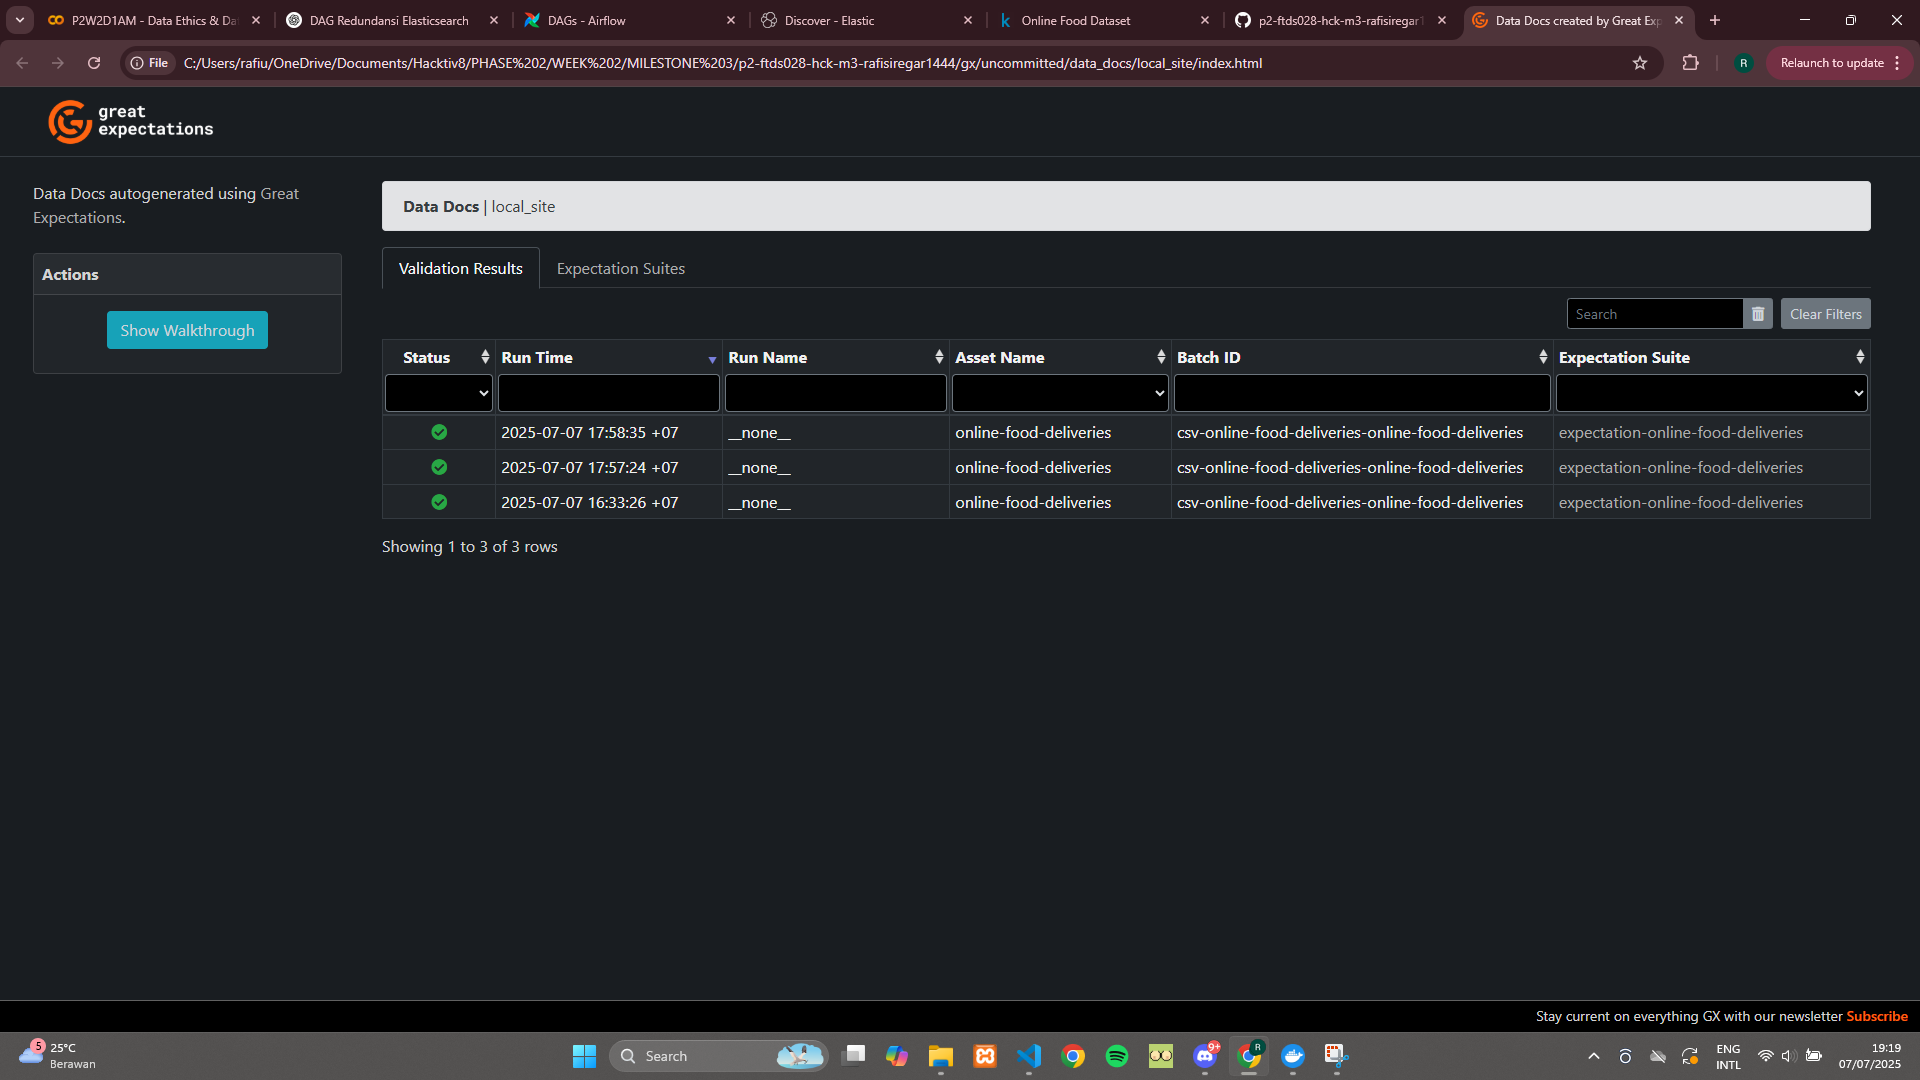

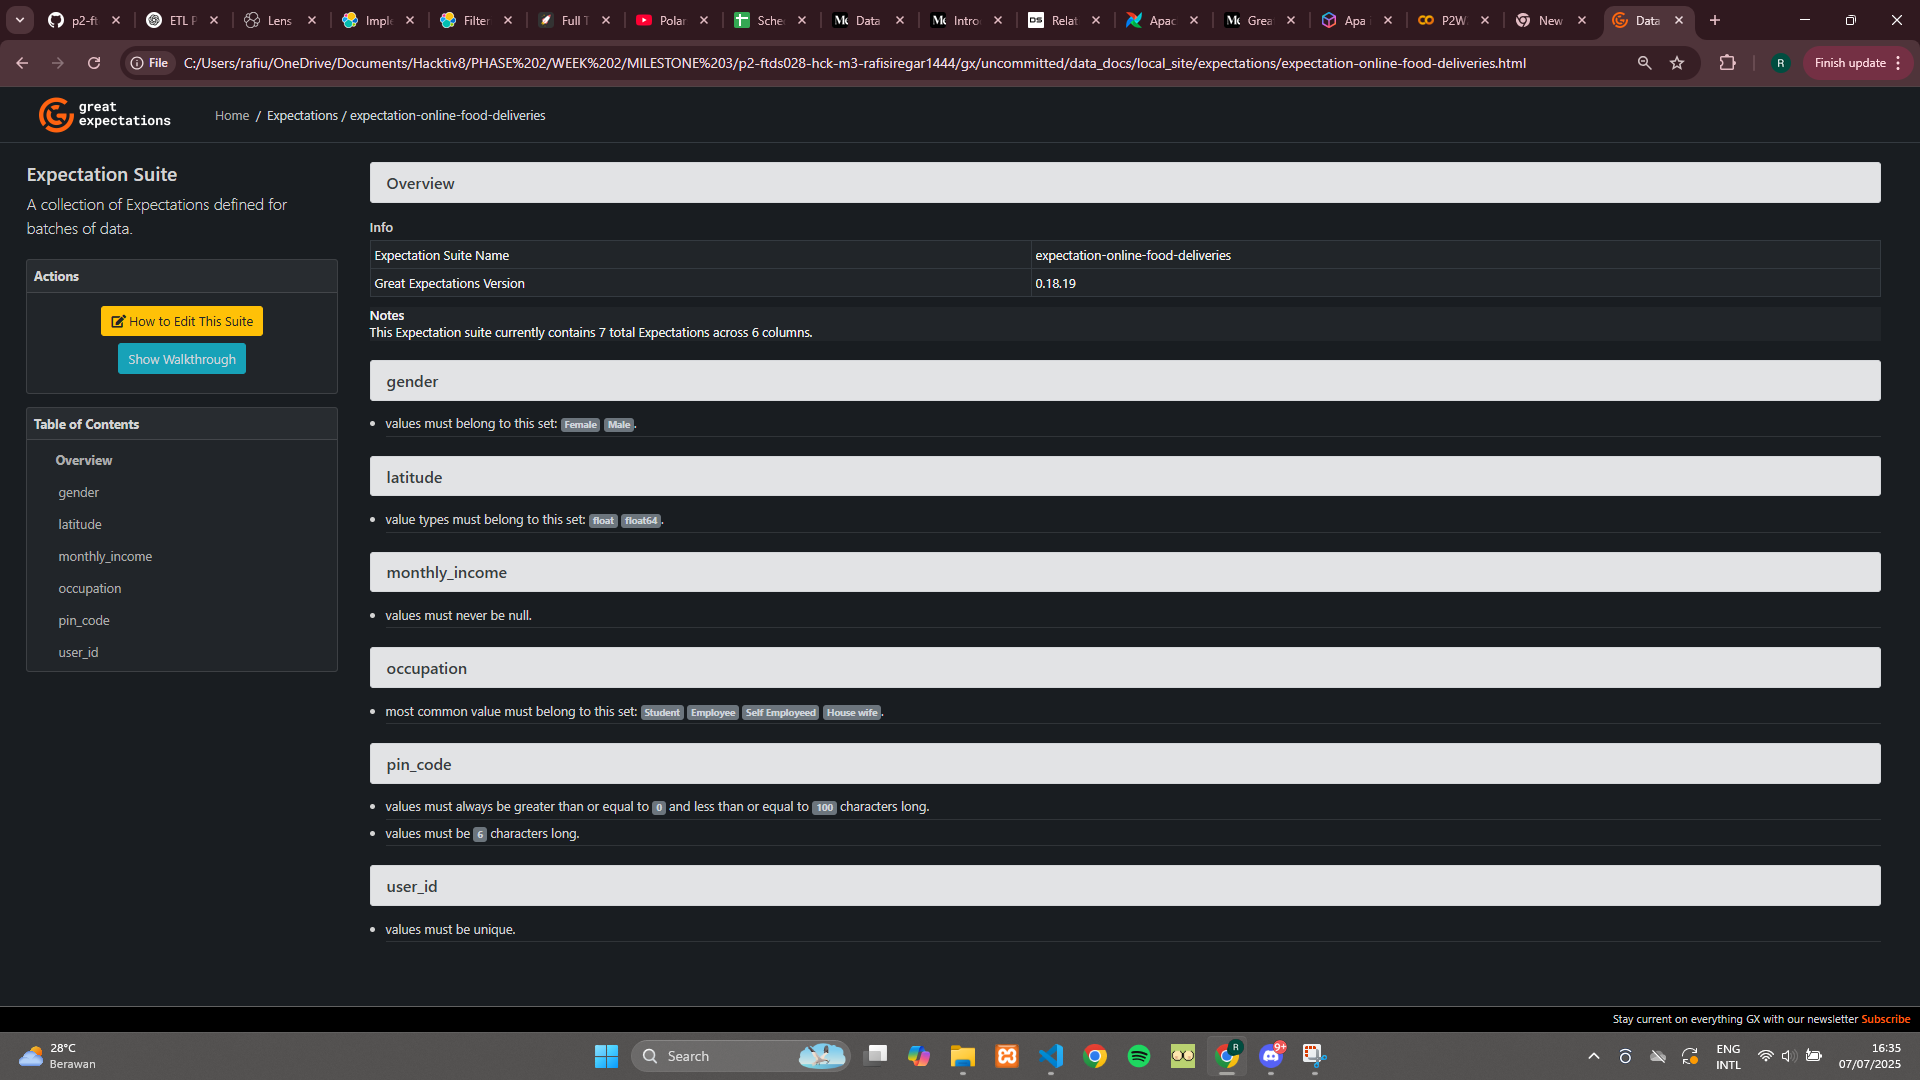